In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Environment setup

### Library preparation

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [138]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df
from JJ_data_processing import xy_by_id,extract_Isw_R0_by_id


from JJformulas import *
from meas_util import *

from JJmeasurement import *

# Sample discription and runid matrix

In [39]:
jj = JJmeas(sample = 'D070B1N5v1')

jj.db_connect()

# Meas

## IVC overview

<IPython.core.display.Javascript object>


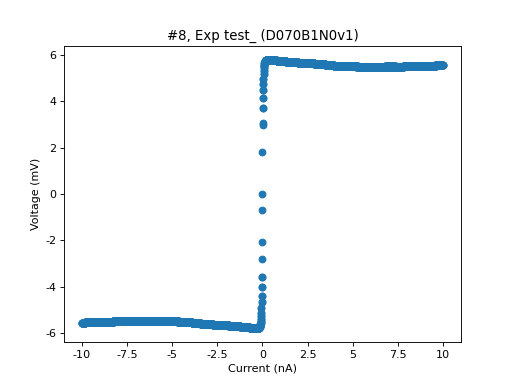

In [5]:
jj.pbi(8)

<IPython.core.display.Javascript object>


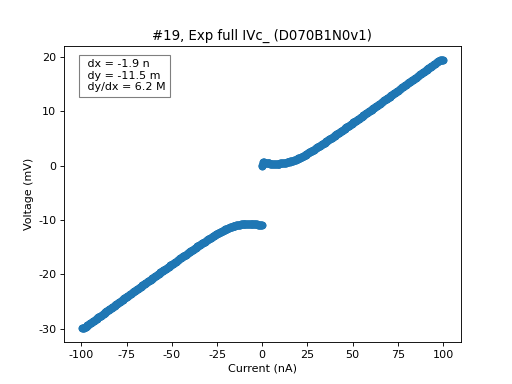

In [36]:
pbi(19, interactive = True)

Rn = 238k
N = 11.2 / 2/ 450 = 14

In [16]:
11.2 / 2/ 400

0.013999999999999999

In [17]:
7/(238/14)

0.4117647058823529

In [6]:
N5old = JJmeas(sample = 'D070B1N5')

<IPython.core.display.Javascript object>


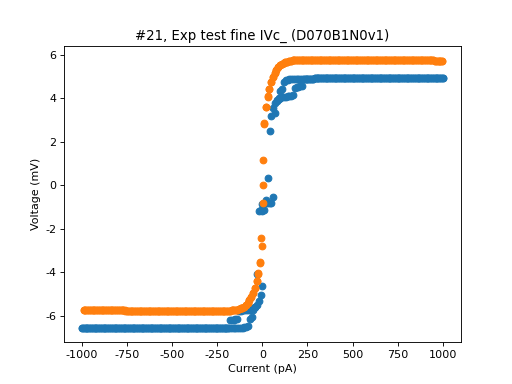

In [13]:
ax = N5old.pbi(1)


jj.pbi(21, axes = ax)

## Fine Ivc

<IPython.core.display.Javascript object>


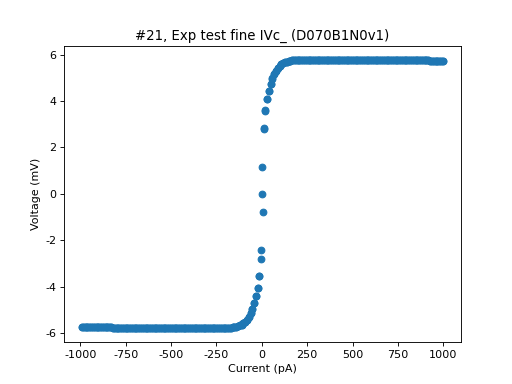

In [44]:
pbi(21)

<IPython.core.display.Javascript object>


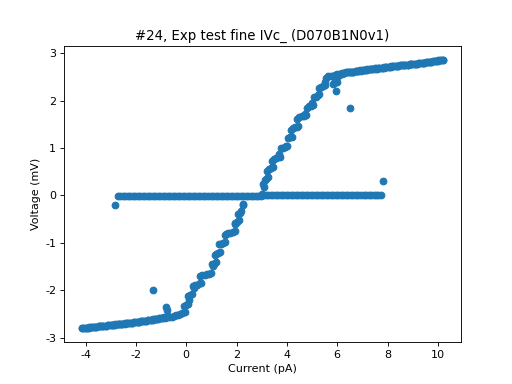

In [52]:
pbi(24)

<IPython.core.display.Javascript object>


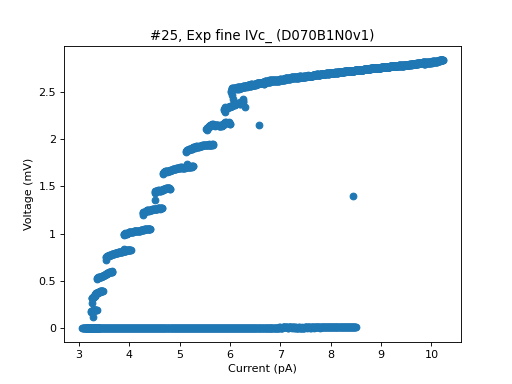

In [73]:
pbi(25, interactive = True)

made a mistake with labelling, this is N5 but N0 device

R0 = 1.8M

<IPython.core.display.Javascript object>


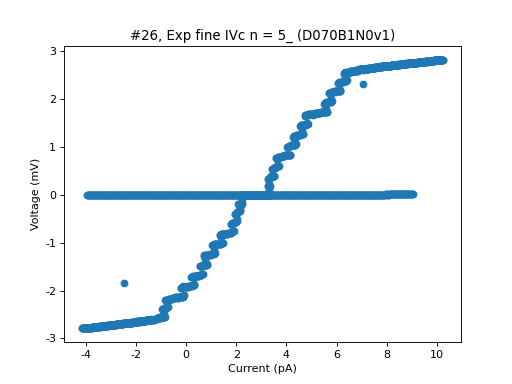

In [18]:
jj.pbi(26)

what's the meaning of step size? 400 or 200? lets meas for higher I, mb there are more steps?

<IPython.core.display.Javascript object>


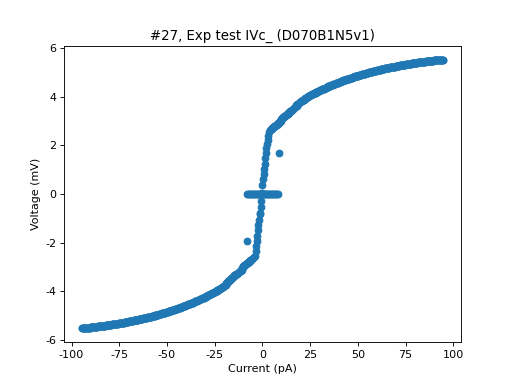

In [15]:
jj.pbi(27)

ok, take a look on the steps in the middle

<IPython.core.display.Javascript object>


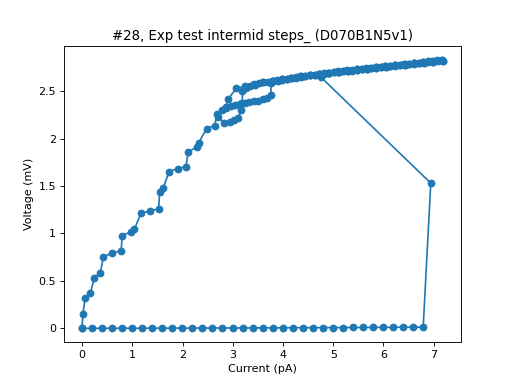

In [22]:
jj.pbi(28, ls = '-')

<IPython.core.display.Javascript object>


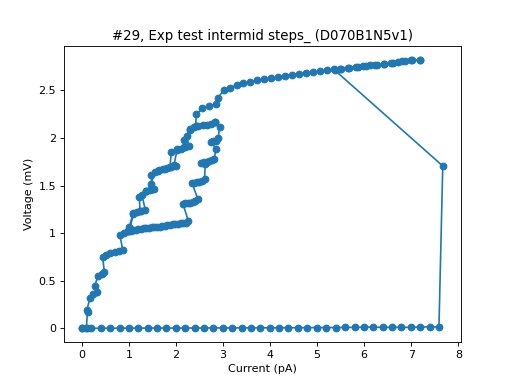

In [26]:
jj.pbi(29, ls = '-')

<IPython.core.display.Javascript object>


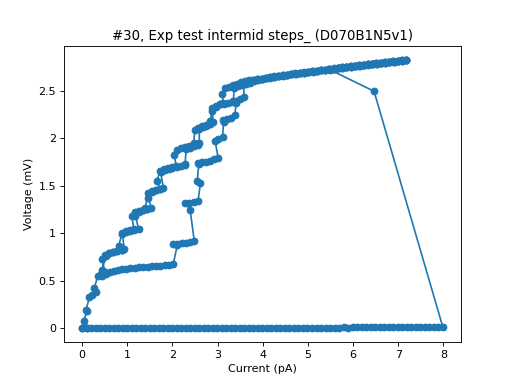

In [32]:
jj.pbi(30, ls = '-')

<IPython.core.display.Javascript object>


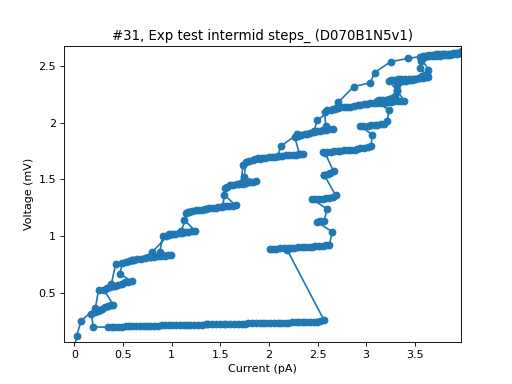

In [37]:
jj.pbi(31, ls = '-')

## B scan

<IPython.core.display.Javascript object>


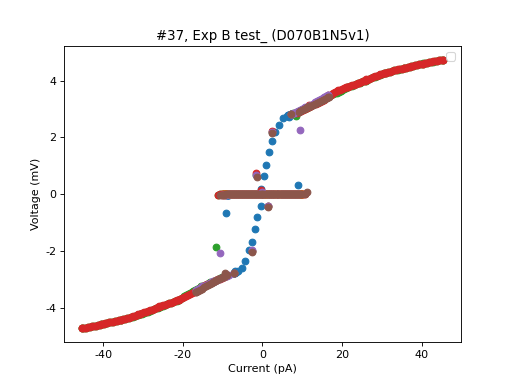

No handles with labels found to put in legend.


In [46]:
jj.bpbi(range(32,37+1), marker = 'o', ls = '')

<IPython.core.display.Javascript object>


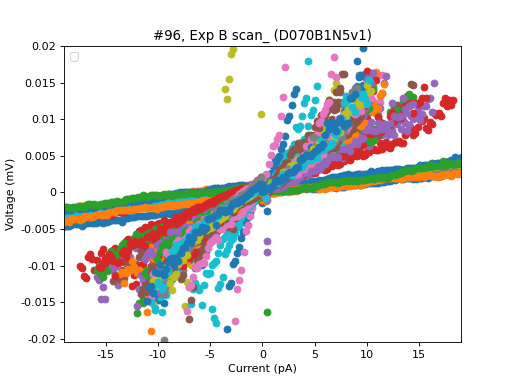

No handles with labels found to put in legend.


In [70]:
jj.bpbi(range(46,96+1), marker = 'o', ls = '')

In [82]:
B_list =   np.linspace(-2e-3, 2e-3, 51)

ids = range(46,96+1)

Ics = [extract_Isw_R0_by_id (idx, dy = 30e-6)[0] for idx in ids]




<IPython.core.display.Javascript object>


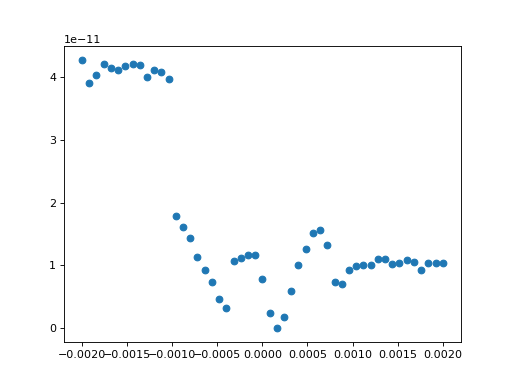

In [84]:
fig, ax = plt.subplots()
ax.plot(B_list, Ics, 'o')

ok, beyond abs(B) > 1mA datapoints dont make sense (hit the B limit), but why Ic is so big there?

<IPython.core.display.Javascript object>


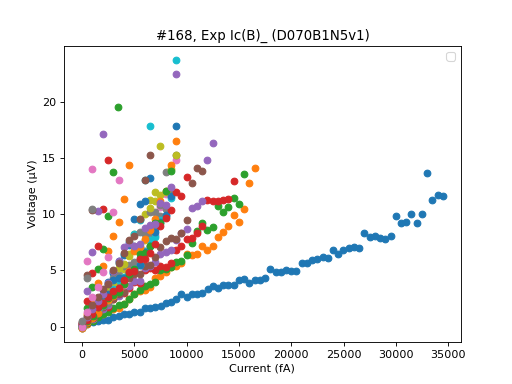

No handles with labels found to put in legend.


In [108]:
jj.bpbi(range(141,168+1), marker = 'o', ls = '-')

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


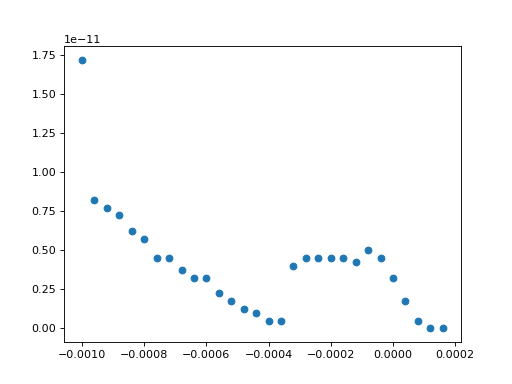

In [115]:
B_list =   np.linspace(-1e-3, 1e-3, 51)[:30]
# B_list =   np.linspace(-1e-3, 1e-3, 51)[32:]

ids = range(141,170+1)
# ids = range(173,191+1)

Ics = [extract_Isw_R0_by_id (idx, dy = 30e-6)[0] for idx in ids]


fig, ax = plt.subplots()
ax.plot(B_list, Ics, 'o')

## B - =1m steps

Somethnig happens at B = -1m, lets do more careful scan there

cn we just scale up B=0 curve to match them?

<IPython.core.display.Javascript object>


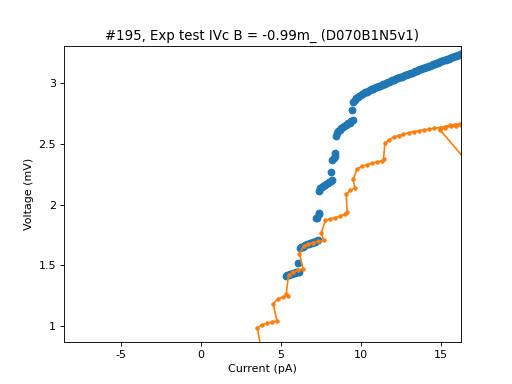

In [166]:
# ax = jj.pbi(193)
ax = jj.pbi(195)

# I, V = xy_by_id(26)
I, V = xy_by_id(194)

# I -= 2.7e-12
I += 0.2e-12
I = I *3.5

ax.plot(I,V, '.-')

<IPython.core.display.Javascript object>


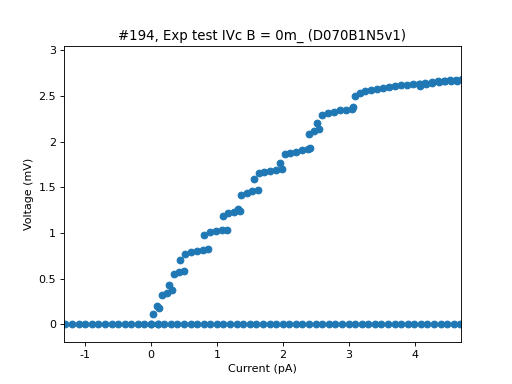

In [149]:
jj.pbi(194)

coompare with B =0 

<IPython.core.display.Javascript object>


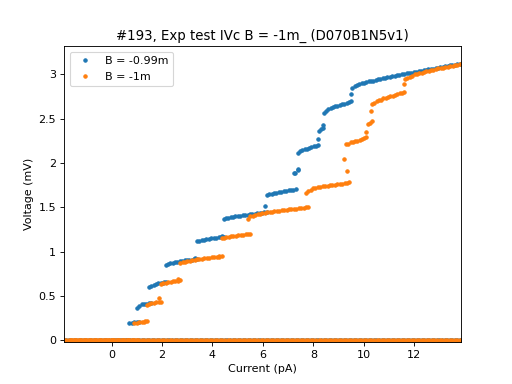

In [168]:
jj.bpbi([195, 193], labels = ['B = -0.99m','B = -1m'], marker = '.', ls = '')

<IPython.core.display.Javascript object>


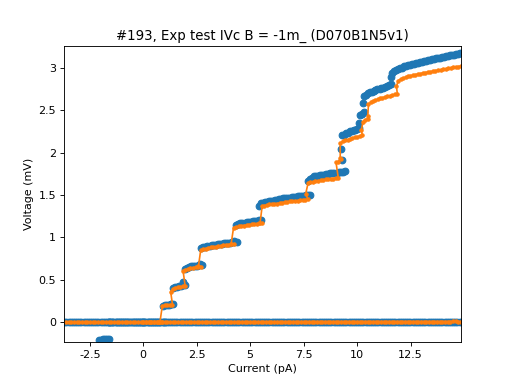

In [170]:
# ax = jj.pbi(193)
ax = jj.pbi(193)

# I, V = xy_by_id(26)
I, V = xy_by_id(195)

# I -= 2.7e-12
# I += 0.2e-12
I = I *1.25

ax.plot(I,V, '.-')

need samller Rsh for easier observation of steps? or just start from high bias?

Rsh = 1e8

<IPython.core.display.Javascript object>


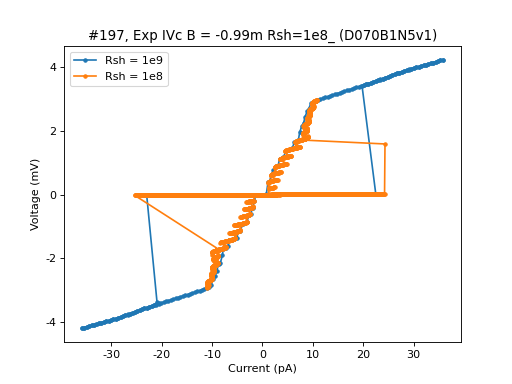

In [193]:
jj.bpbi([201, 197], labels = ['Rsh = 1e9','Rsh = 1e8'], marker = '.', ls = '-')

anyway, it's worth checking whether the flux is trapped - try n78n5

doenst work - go back to this sample, check if everything works

<IPython.core.display.Javascript object>


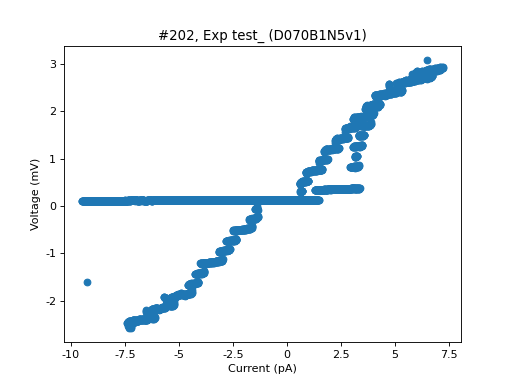

In [197]:
jj.pbi(202)

want to trace critical current at different steps

## interm steps

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


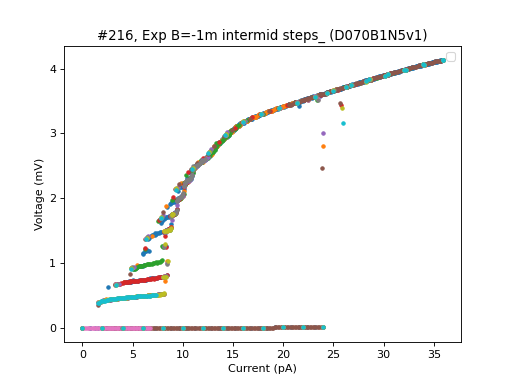

No handles with labels found to put in legend.


In [232]:
jj.bpbi(range(207, 216+1), ls = '', marker = '.')

repeat for B = 0

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


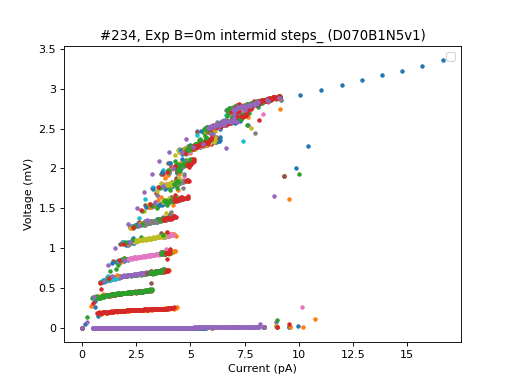

No handles with labels found to put in legend.


In [298]:
jj.bpbi(range(220, 234+1), ls = '', marker = '.')

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


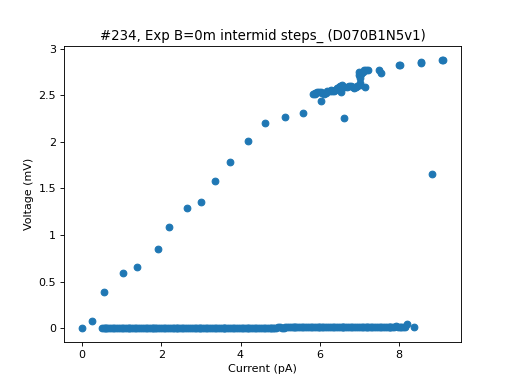

In [297]:
pbi(234)

combine

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


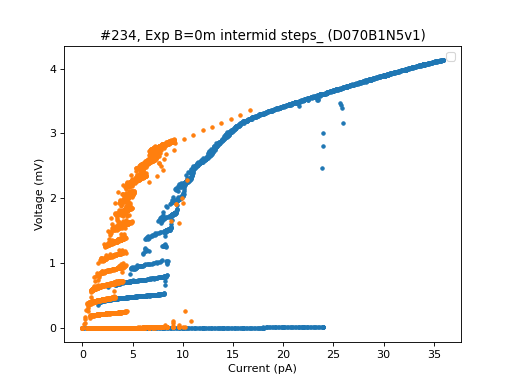

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [318]:
ax = jj.bpbi(range(207, 216+1), ls = '', marker = '.', c = 'C0')
jj.bpbi(range(220, 234+1), ls = '', marker = '.', c = 'C1', ax = ax)

## Ic(B) with steps

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


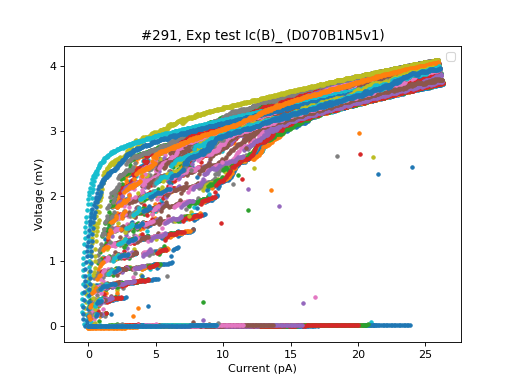

No handles with labels found to put in legend.


In [323]:
jj.bpbi(range(241, 291+1), marker = '.', ls = '')

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


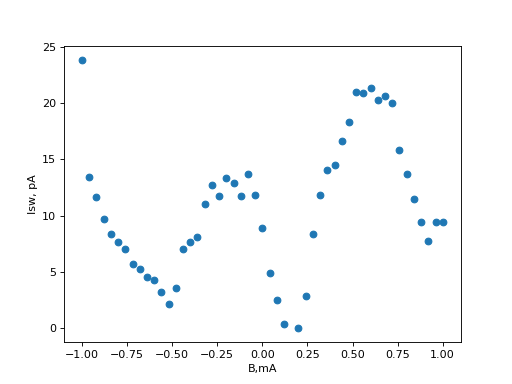

Text(0.5, 0, 'B,mA')

In [414]:
B_list =   np.linspace(-1e-3, 1e-3, 51)
ids = range(241, 291+1)


Ics = [2/1e-12*extract_Isw_R0_by_id (idx, dy = 30e-6, yoff =0 )[0] for idx in ids]


fig, ax = plt.subplots()
ax.plot(B_list/1e-3, Ics, 'o')

ax.set_ylabel('Isw, pA')
ax.set_xlabel('B,mA')

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


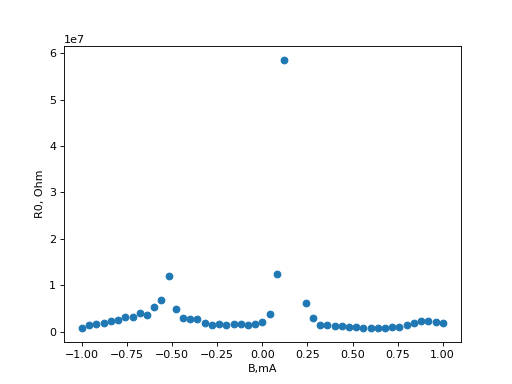

Text(0.5, 0, 'B,mA')

In [417]:
B_list =   np.linspace(-1e-3, 1e-3, 51)
ids = range(241, 291+1)


R0s = [extract_Isw_R0_by_id (idx, dy = 30e-6, yoff =0 )[1] for idx in ids]


fig, ax = plt.subplots()
ax.plot(B_list/1e-3, R0s, 'o')

ax.set_ylabel('R0, Ohm')
ax.set_xlabel('B,mA')

check ivc at nearFF

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


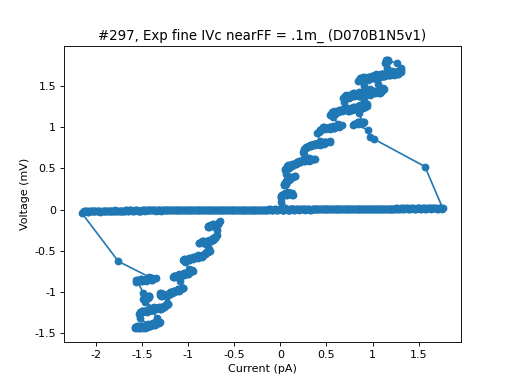

In [350]:
jj.pbi(297, ls = '-')

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


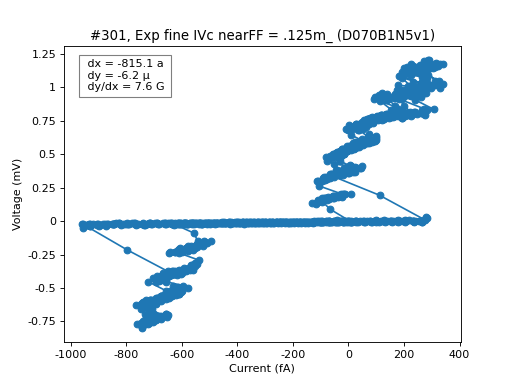

In [474]:
jj.pbi(301, ls = '-', interactive = True)

30Mohm

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


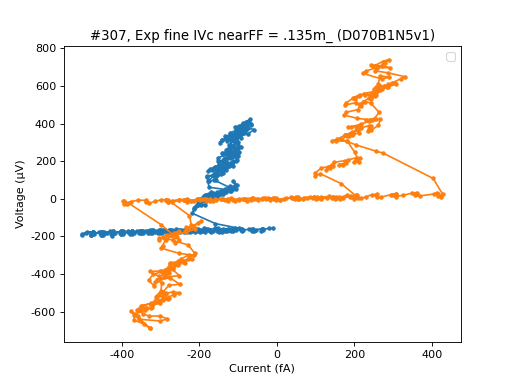

No handles with labels found to put in legend.


In [385]:
jj.bpbi([304, 307], ls = '-', marker = '.')

large oscillations related to T??

try even closer to FF

noisy, Navg = 10

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


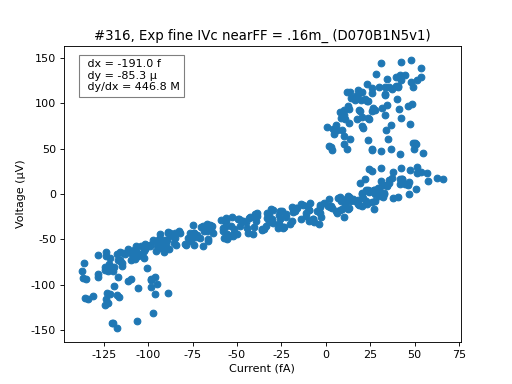

In [473]:
jj.pbi(316, ls = '', interactive = True)

R ~ 450 M

so, T setpoint was 30mk all the time (and T8 ~ 30 - 31), so feedback loop was on. mb it would be better if i disconnect it?

what if meas zero bias V as a function of t? say at diff B?

## Time scans

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


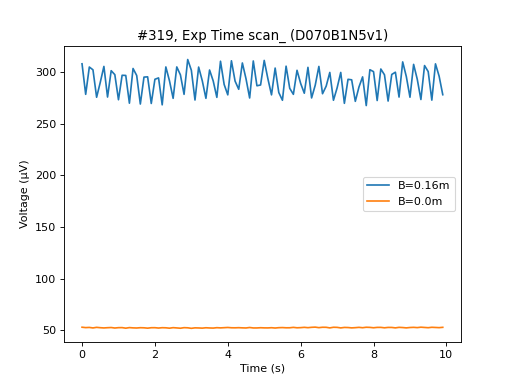

In [444]:
jj.bpbi([318, 319], ls = '-', labels = ['B=0.16m', 'B=0.0m'])

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


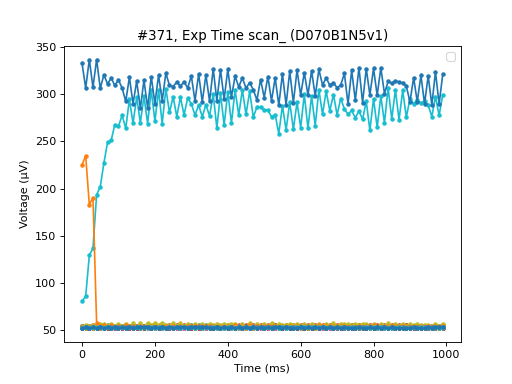

No handles with labels found to put in legend.
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


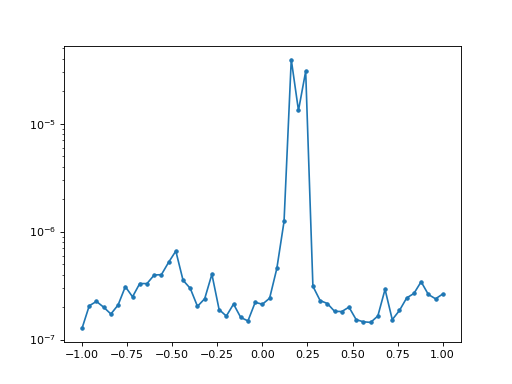

In [466]:
ids = range(321, 371+1)

jj.bpbi(ids, ls = '-', marker = '.')

std = [np.std(xy_by_id(idx)[1]) for idx in ids]
 
fig, ax = plt.subplots()


B_list = np.linspace(-1e-3, 1e-3, 51) 
ax.plot(B_list/1e-3, std, '.-') 
ax.set_yscale('log')

closer look at FF

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


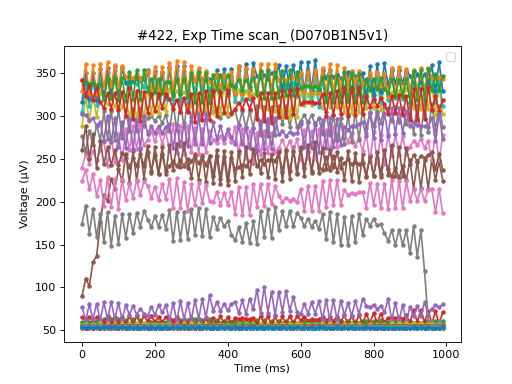

No handles with labels found to put in legend.
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


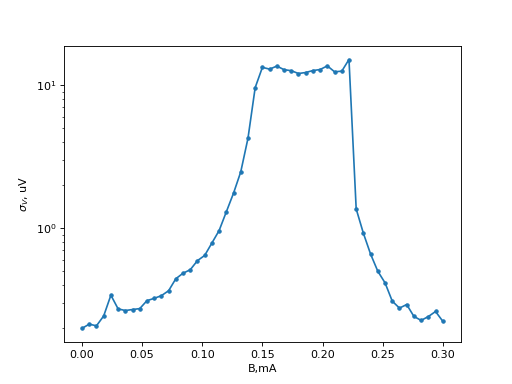

Text(0.5, 0, 'B,mA')

In [485]:
ids = range(372, 422+1)

jj.bpbi(ids, ls = '-', marker = '.')

std = [1e6*np.std(xy_by_id(idx)[1][10:-5]) for idx in ids]
 
fig, ax = plt.subplots()


B_list = np.linspace(0e-3, .3e-3, 51) 
ax.plot(B_list/1e-3, std, '.-') 
# ax.plot( std, '.-') 
ax.set_yscale('log')

ax.set_ylabel(r'$\sigma_V$, uV')
ax.set_xlabel('B,mA')

check what happens with noise with diff Rsh

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


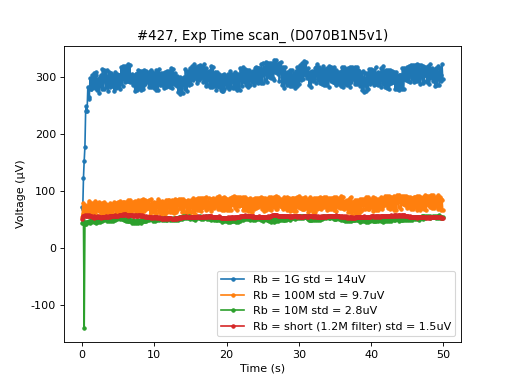

In [503]:
ids = [423, 424, 425, 427]

std = [1e6*np.std(xy_by_id(idx)[1][10:-5]) for idx in ids]
labs = ['Rb = 1G std = {:1.2g}uV'.format(std[0]),
        'Rb = 100M std = {:1.2g}uV'.format(std[1]),
        'Rb = 10M std = {:1.2g}uV'.format(std[2]),
        'Rb = short (1.2M filter) std = {:1.2g}uV'.format(std[3])]


jj.bpbi(ids , ls = '-', marker = '.', labels = labs)

thermal noise from Rb??

remeas ZZ (B = 0.16mA) with short Rb (means we have only 1M filter + 200k onchip)

have to replace Rsh 1 M with 

## Rb = short

start with ZF B = 0

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


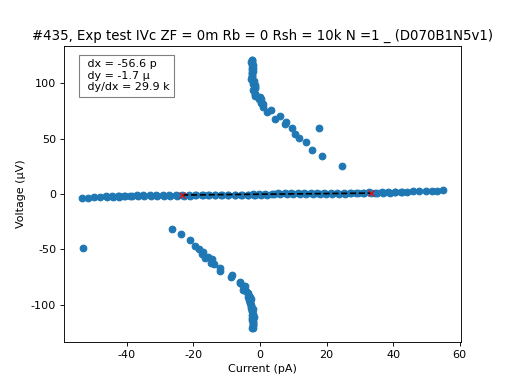

In [530]:
jj.pbi(435, interactive = True)

R0 is definetely smaller! ~ 30 k 

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


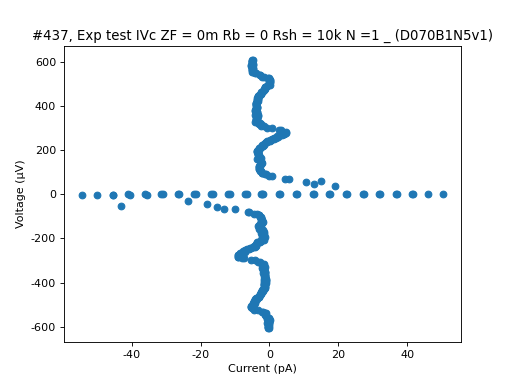

In [531]:
jj.pbi(437)

is it possible to meaasure full ivc with this method?

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


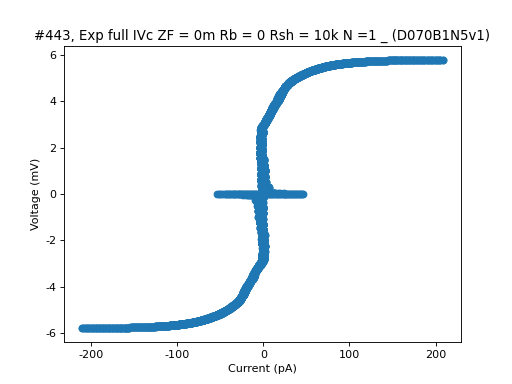

In [546]:
jj.pbi(443)

it should be vertical line, not a negative, correct rsh rb?

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


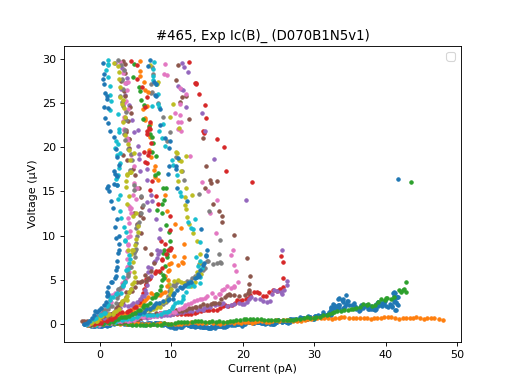

No handles with labels found to put in legend.


In [556]:
jj.bpbi(range(445, 465+1), ls = '', marker = '.')

# Results

## to do

- Ir gradually changes for diff steps. Ic or Q  changes?

- check two sets of steps?

- play with Rsh, Idut, ..

- T stab?